In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

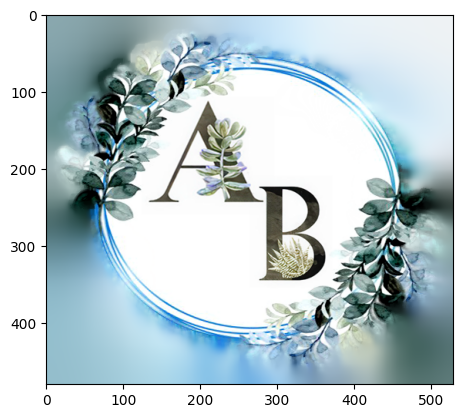

In [5]:
img = cv2.imread('nameLogo.png', cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [6]:
#This function to get x and y axis gradients of the image and combine them
def grad_thresh(img, min_thresh, max_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    x_grad = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    y_grad = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    G = np.sqrt(x_grad**2 + y_grad**2)

    G = np.uint8(G / G.max() * 255)
    out = cv2.inRange(G, min_thresh, max_thresh)
    return out

def update(min_thresh, max_thresh):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(img)
    ax2.imshow(grad_thresh(img, min_thresh, max_thresh), cmap = "gray")
    
interact(update, min_thresh = (0, 255), max_thresh = (0, 255)) # 22, 54

interactive(children=(IntSlider(value=127, description='min_thresh', max=255), IntSlider(value=127, descriptio…

<function __main__.update(min_thresh, max_thresh)>

In [7]:
#this function for getting LAB channel threshold values
def lab_B_thresh(img, min_thresh, max_thresh):
    B = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)[:, :, 2] 
    out = cv2.inRange(B, min_thresh, max_thresh)
    return out

def update(min_thresh, max_thresh):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(img)
    ax2.imshow(lab_B_thresh(img, min_thresh, max_thresh), cmap = "gray")

interact(update, min_thresh = (0, 255), max_thresh = (0, 255)) #142, 255

interactive(children=(IntSlider(value=127, description='min_thresh', max=255), IntSlider(value=127, descriptio…

<function __main__.update(min_thresh, max_thresh)>

In [8]:
#This function for getting HLS channel threshold values
def hls_L_thresh(img, min_thresh, max_thresh):
    L = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[:, :, 1] 
    out = cv2.inRange(L, min_thresh, max_thresh)
    return out

def update(min_thresh, max_thresh):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    f.subplots_adjust(hspace=.2, wspace=.05)
    ax1.imshow(img)
    ax2.imshow(hls_L_thresh(img, min_thresh, max_thresh), cmap = "gray")

interact(update, min_thresh = (0, 255), max_thresh = (0, 255)) #190, 255

interactive(children=(IntSlider(value=127, description='min_thresh', max=255), IntSlider(value=127, descriptio…

<function __main__.update(min_thresh, max_thresh)>

True

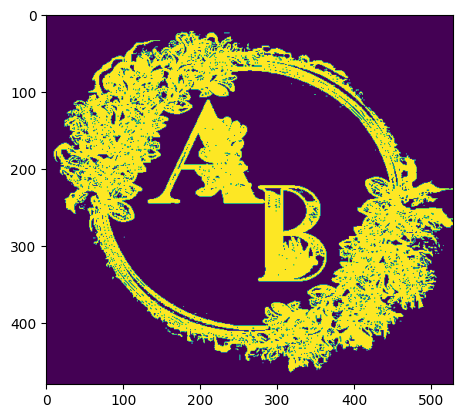

In [11]:
#Pipeline function to combine image with mask
#the values set for functions are best suited for this paricular image
def pipeline(image):
    B_binary = lab_B_thresh(img, 135, 255)
    # L_binary = hls_L_thresh(img, 145, 255)
    return cv2.bitwise_or(B_binary, grad_thresh(img, 8, 255))

new_img = pipeline(img)
plt.imshow(pipeline(img))


True

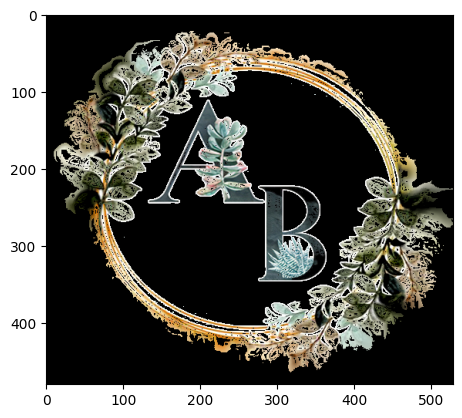

In [12]:
final_img = cv2.bitwise_and(img, img, mask=new_img)
plt.imshow(final_img[:,:,::-1])
cv2.imwrite('new_logo.png', final_img)